# Twitter sentiment for five major news agencies

Pull the most recent 100 tweets from BBC News, CBS News, CNN, Fox News, and the New York Times.  

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
from datetime import datetime
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twitterapi import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_users = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes")

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets) for each target user
for user in (target_users):
    # Counter
    counter = 1
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            print("Tweet %s: %s" % (counter, tweet["text"]))
        
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
        
            # Add sentiments for each tweet into an array
            sentiments.append({"News Agency": user,
                                "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter,
                              "Tweet": tweet["text"]})
        
            # Add to counter 
            counter = counter + 1



Tweet 1: UK ivory ban among 'toughest' in the world, says Gove https://t.co/zs3TZKrB1d
Tweet 2: 'One-stop shops' set to speed up cancer diagnosis https://t.co/MFhvaEqcKf
Tweet 3: Calor gas shortages leave customers without heating https://t.co/Hs2nF3uNbg
Tweet 4: Momentum admits Labour 'failure' over anti-Semitism https://t.co/O5zEjqutYL
Tweet 5: Met Police investigated over death of arrested man https://t.co/t7pRlNJ8sx
Tweet 6: RT @BBC_HaveYourSay: Have you ever had to choose between the love of your life and your favourite sports team? #harryandmeghan's #RoyalWedd…
Tweet 7: AI 'poses less risk to jobs than feared' says OECD https://t.co/7CS3sn6n1I
Tweet 8: RT @BBCSteveR: Russia's Foreign Minister Sergei Lavrov tells me why current tension between Moscow &amp; the West "is worse now than in the old…
Tweet 9: Snow, rain and floods make bank holiday travels a trial https://t.co/NV1ymrEg8s
Tweet 10: Probe launched into Wrexham's HMP Berwyn prison death https://t.co/gkFDZehazt
Tweet 11: N

Tweet 81: Special needs cash shortfall 'leaves thousands of pupils unplaced' https://t.co/cdDPMiO6XY
Tweet 82: Anthony Joshua beats Joseph Parker on points to add WBO world heavyweight title https://t.co/wK0SKDNiWQ
Tweet 83: Spy poisoning: UK plays down Russia complaint at plane search https://t.co/HCb3NrprDP
Tweet 84: Women found dead six hours after Basingstoke crash 'were amazing' https://t.co/z3VZRL4XnE
Tweet 85: 8-year-old Alexa is going blind — she's created a list of things she wants to see before that happens ❤️ https://t.co/dr2Nrg3wkp
Tweet 86: RT @ChrisMasonBBC: Christine Shawcroft will be replaced on Labour's National Executive Committee by Eddie Izzard
Tweet 87: Shawcroft quits Labour ruling body https://t.co/P87CTEHuQT
Tweet 88: RT @BBCSport: An inspirational young man. 👏

Billy Monger, who had both his legs amputated after a crash last year, finished third on his B…
Tweet 89: RT @BBCSteveR: After reading today's Russian papers, I have some good news &amp; some bad news. T

Tweet 41: Most Americans don't think teachers in their community are paid enough, according to a recent CBS News poll… https://t.co/vZHpmxDCu6
Tweet 42: Taylor Swift delivers surprise performance for a crowd of approximately 40 people at Nashville's Bluebird Cafe; the… https://t.co/UMEOcyBNzu
Tweet 43: When Dr. Martin Luther King Jr. was murdered, 50 years ago this week, Martin the third, Dexter &amp; Bernice King were… https://t.co/pa6jBHsZCn
Tweet 44: "We are the future. Our students are the future. And they need to fund our future." Thousands of teachers flooded t… https://t.co/CbJL1Tm27R
Tweet 45: Forget the Easter Bunny. A family in Florida just had a run-in with the Easter Alligator and caught the whole thing… https://t.co/L0OVvVCWQW
Tweet 46: With a record number of women running for office, departing Planned Parenthood president Cecile Richards tells… https://t.co/WzbzldGUMY
Tweet 47: Congressional Democrats raise ethics questions about Trump defense fund https://t.co/n0aG5IFtd

Tweet 1: CNN's @ErinBurnett: "The President talks the tough talk on firing. But when it comes down to it, he isn't saying th… https://t.co/yRkBi4aPUh
Tweet 2: RT @OutFrontCNN: "It's not a dog whistle. It's a foghorn. ... It's simply racist to say that people are stealing our country." - Democratic…
Tweet 3: 4 groups that are warming up to Donald Trump | Analysis by @CillizzaCNN https://t.co/XlCSBzqcHD https://t.co/bNatECK1LM
Tweet 4: "Is this America's new face to the world?" asks Ruth Ben-Ghiat, writing via @CNNOpinion about this photo of White H… https://t.co/emYfkdkufe
Tweet 5: A Florida middle school teacher is resigning after it was found she was also the host of a white supremacist podcas… https://t.co/AjDkPaplrX
Tweet 6: Trump is obsessed with going 'nuclear' in the Senate | Analysis by CNN's Z. Byron Wolf https://t.co/ILKDLi4fWQ https://t.co/zP0OaZKdvk
Tweet 7: Roger Stone's potential ties to WikiLeaks and its founder, Julian Assange, are being investigated by special counse… h

Tweet 61: An official with the US Immigration and Customs Enforcement office in San Francisco apologized for posting an image… https://t.co/NNBmMXOTrL
Tweet 62: Losing MLK "hurts all the time," but we fight on, Jesse Jackson says https://t.co/NUfuH4Chuc via @CNNOpinion https://t.co/QGS3mQzJal
Tweet 63: Why Sinclair matters: The company is the largest owner of local TV stations in the US, and local news is Americans'… https://t.co/FtwlHH0iZH
Tweet 64: Sinclair's fake-news zombies should terrify you | By David Rothkopf via @CNNOpinion https://t.co/rmEhwdbIdR https://t.co/G9vZz0YIQw
Tweet 65: A coal power company files for bankruptcy and asks President Trump for a bailout https://t.co/BHqry0OJUr https://t.co/qIhW9NhYgV
Tweet 66: Critics are calling Sinclair's promos pro-Trump propaganda. Now the company is defending the initiative as a "corpo… https://t.co/xPRM8RxI31
Tweet 67: Inspired by the West Virginia strike in which teachers demanded and got a pay raise from state leaders, a wave of

Tweet 21: Hiker, 25, plunges to his death from dangerous Hawaii trail https://t.co/jnOC9xvQwO
Tweet 22: The Marines ease tattoo rules, the strictest in the military https://t.co/9DctYdv5ZY
Tweet 23: Mary Ann Mendoza, whose son was killed by an illegal immigrant: “Our politicians don’t have to negotiate or offer a… https://t.co/wnOY9R5s35
Tweet 24: Stoneman Douglas students return to class mandatory carrying clear backpacks https://t.co/arcZRqMaEb
Tweet 25: Kathy Griffin wants audiences to laugh off her infamous Trump photo https://t.co/8tKPI1wDsz
Tweet 26: .@RobGronkowski fulfills heart transplant patient's 'one wish' https://t.co/QqA7uVAXEy
Tweet 27: Amb. Geronimo Gutierrez: "[NAFTA] needs updating and modernizing and that's why we're focusing, with the U.S. and o… https://t.co/jQqfHqzF1L
Tweet 28: EXCLUSIVE: @usairforce veteran sues after being pulled from ceremony mid-speech https://t.co/qU6Q1abWJ9
Tweet 29: "It is in our own interest to have a secure border in our southern border a

Tweet 1: RT @nytimesworld: Two self-described sex instructors from Belarus have been detained in Thailand. They say they have evidence of Russian in…
Tweet 2: EPA chief Scott Pruitt had a $50-a-day condo linked to lobbyists. Their client’s project got approved. https://t.co/SuZnUhOizI
Tweet 3: RT @alanblinder: I visited Memphis last month to talk with students about the Rev. Dr. Martin Luther King Jr. Here's what they said. https:…
Tweet 4: Evening Briefing: Here's what you need to know at the end of the day https://t.co/9LkECFxe12
Tweet 5: President Trump is nominating an economic moderate to the No. 2 job at the Treasury, even as Trump takes a more haw… https://t.co/5yrG5Lvz48
Tweet 6: More than 200 dolphins that died in Brazil were “environmental sentinels,” a biologist says. “When something is wro… https://t.co/WEZ116kzP2
Tweet 7: Katrina Ruff, a local teacher in Oklahoma City, carried a sign that read, “Thanks to West Virginia.” 

“They gave u… https://t.co/NOljYUOQp7
Tweet 8: The

Tweet 61: RT @nytpolitics: He's been a Muppet wrangler and the U.S. ambassador to France. Now Charles Rivkin is Hollywood's head cheerleader. https:/…
Tweet 62: As vaping rises at high schools and middle schools, officials are worried e-cigarettes are creating a new generatio… https://t.co/PSMW4B4CV9
Tweet 63: Last fall, we shared readers' 13-word stories of romance, obsession and heartbreak. Here are some more of the thous… https://t.co/oytdtBXYvW
Tweet 64: Steven Bochco, the producer of “Hill Street Blues” and “NYPD Blue,” died on Sunday. His gritty police dramas change… https://t.co/TDhOqQuazn
Tweet 65: RT @TimHerrera: Stop wasting money and finally start that budget. Here are some tips to get you going. https://t.co/ufXXY3Hozb
Tweet 66: The race to automate stores is underway https://t.co/NYywyTdden
Tweet 67: A 77-year-old who owns an estimated 75 guns: "It'll go away. Like all the other times."
A 17-year-old who protests:… https://t.co/lLYxoinohJ
Tweet 68: Review: NBC’s “Jesus Chr

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[["News Agency", "Tweets Ago", "Date", "Compound", 
                               "Positive", "Neutral", "Negative", "Tweet"]]
sentiments_pd.to_csv("newsagency_sentiment_data.csv")
print(sentiments_pd.shape)
sentiments_pd.head()

(500, 8)


,News Agency,Tweets Ago,Date,Compound,Positive,Neutral,Negative,Tweet
0,@BBCNews,1,Mon Apr 02 23:43:30 +0000 2018,-0.5574,0.000,0.265,0.735,"UK ivory ban among 'toughest' in the world, sa..."
1,@BBCNews,2,Mon Apr 02 23:10:50 +0000 2018,-0.6597,0.000,0.355,0.645,'One-stop shops' set to speed up cancer diagno...
2,@BBCNews,3,Mon Apr 02 19:24:03 +0000 2018,-0.2023,0.000,0.318,0.682,Calor gas shortages leave customers without he...
3,@BBCNews,4,Mon Apr 02 18:32:40 +0000 2018,0.2960,0.268,0.000,0.732,Momentum admits Labour 'failure' over anti-Sem...
4,@BBCNews,5,Mon Apr 02 18:07:37 +0000 2018,-0.7906,0.000,0.500,0.500,Met Police investigated over death of arrested...


# Using the DataFrame above, create a scatter plot for the sentiment of all 500 tweets

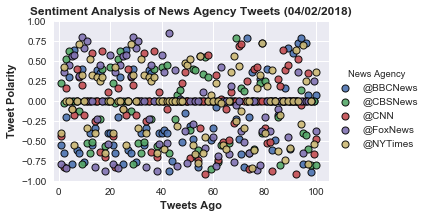

In [4]:
# Scatter plot for the sentiment of 100 tweets per target_user

# Set gray grid
sns.set(style='darkgrid')
plt.figure(figsize = (20,20))
fg = sns.FacetGrid(sentiments_pd, hue='News Agency', aspect=1.61, legend_out = True)
fg.map(plt.scatter, 'Tweets Ago', 'Compound', 
       s=50, alpha=0.9, edgecolors="black", linewidth=1).add_legend()
plt.title("Sentiment Analysis of News Agency Tweets (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.xlabel("Tweets Ago",fontweight='bold')
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.xlim(-2,105,0)
plt.ylim(-1,1)
plt.savefig("Tweets_Sentiment")
plt.show()

# Observation #1

For the most part the sentiment plots are well distributed on the scatterplot.  However, many of the tweets have a compound or polarity rating of 0.  

# Take the main DataFrame and calculate the mean compound rating of the tweets for each news agency.  Plot the mean compound score for each news agency.

In [5]:
# Get the mean sentiment for each target_user
# Only compound sentiment is needed but I wanted to see all sentiment averages
mean_values = pd.pivot_table(sentiments_pd, index = ["News Agency"],
                                   values = ("Compound", "Positive", "Neutral", "Negative"), aggfunc=np.mean)

# Flattenning the header to clean up the dataframe for mean values
mean_sentiment = pd.DataFrame(mean_values.to_records())
mean_sentiment = mean_sentiment[["News Agency", "Compound", "Positive", "Neutral", "Negative"]]
mean_sentiment

,News Agency,Compound,Positive,Neutral,Negative
0,@BBCNews,-0.145112,0.06381,0.14931,0.78685
1,@CBSNews,-0.084273,0.04776,0.07866,0.87361
2,@CNN,-0.052109,0.06091,0.08400,0.85513
3,@FoxNews,-0.064388,0.07187,0.09742,0.83069
4,@NYTimes,-0.028460,0.06963,0.06926,0.86108


# Observaton #2

All of the news agencies have an overall negative sentiment rating for the last 100 tweets, which results in a negative compound mean.

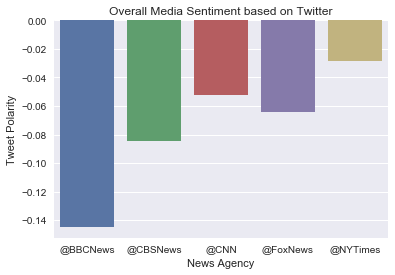

In [6]:
# Create bar chart for mean sentiment by News Agency
sns.barplot(x = 'News Agency', y = 'Compound', data = mean_sentiment, label = 'News Agency')
plt.title("Overall Media Sentiment based on Twitter")
plt.xlabel("News Agency")
plt.ylabel("Tweet Polarity")
plt.savefig("News_Agency_Sentiment")
plt.show()

# Observation #3

The most negative of the five news agencies is BBC News.  I am not sure if this is because news reporting in the UK tends to have a more negative slant or if perhaps the more proper English of the BBC tweets garners a more negative sentiment score.  I ran this analysis on different days and the results were essentially the same.